In [1]:
# Import required modules
import glob
import scipy.io as sio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import sklearn
import analysisFunctions as af

from scipy.stats import zscore
from scipy import stats
#-------------------------------------------------------------------------------

# Read in and store the framewise displacement (fd) for the given dataset in a variable called fdAvgs,
# and create the TS_path_names and indices2Keep variables

# Store the fdAvgs and set a threshold fd

# filePath = '/Users/AV/Dropbox/COBRE/movementData/fdAvgs_COBRE.txt'
# fdAvgs = pd.read_csv(filePath,header=None);
# threshold_fd = np.linspace(0.72,0.21,18)

# df1 = pd.DataFrame({'fd': [], 'SCZ': [], 'Control': [], 'Total': [], 
#                     'SCZ:Control': [], 'AvgROIAcc': [], 'AvgROIError': [], 'AvgFeatAcc': [], 'AvgFeatError': []})

# for threshold_fd in threshold_fd[1]:
#     # Store the path of the folder containing the subject data for the given dataset
#     subPath = '/Users/AV/Dropbox/COBRE/cfgData/'

#     # Need to alphabetise and store the subject file names into a variable
#     TS_path_names = sorted(glob.glob(subPath + '*.mat'))

#     # Filter the subjects based on their fd, and retain the subjects that have an fd < threshold_fd
#     TS_path_names, indices2Keep = af.removePathNames(filePath, threshold_fd, TS_path_names)
#     indices2Keep = indices2Keep.tolist()

#     # Adding 1 to every element in the array to convert to MATLAB indexing
#     indices2KeepMat = list(np.asarray(indices2Keep) + 1)

#     # print(indices2KeepMat)
#     #-------------------------------------------------------------------------------
    
#     # Add a multi-level index to the tsData and store some key variables

#     element = 'element1_COBRE.txt' # Read in the feature matrix data from the saved .txt file
#     PyFeatList = 'PythonFeatureList.txt' # This text file contains the 22 feature names
    
#     # Add a multi-level index to the feature matrix and save into the variable, tsData
#     # Also store the number of ROIs and subjects in the data
#     tsData, ROIs, subjects, feats, featList = af.addIndices(element,subPath,PyFeatList)
#     #-------------------------------------------------------------------------------

#     # Choose which feature to analyse
#     feature = 1
#     featureName = featList[feature-1]
#     #-------------------------------------------------------------------------------

#     # Choose which ROI to analyse
#     ROI = 1
#     #-------------------------------------------------------------------------------

#     # Create the target column - unique for each dataset

#     # Select which dataset is being used
#     dataset = 'COBRE'

#     if dataset == 'UCLA':

#         # Creating the target column
#         targetCol = af.getTargetCol(TS_path_names)

#     elif dataset == 'COBRE':

#         # Creating the target column
#         csvPath = '/Users/AV/Dropbox/COBRE/participants.csv'
#         COBRE = pd.read_csv(csvPath,header=None);

#         targetCol = COBRE.iloc[1:,2]
#         targetCol = targetCol.tolist()
#         targetCol = pd.DataFrame(data=targetCol, columns=['target'])

#         targetCol = targetCol.iloc[indices2Keep,:]
#         targetCol = np.asarray(targetCol,dtype=np.int)

#         # A '0' indicates a control subject and a '1' indicates a subject with SCZ
#         targetColModified = np.where(targetCol==1, 0, targetCol) # First change the pre-existing 1s to 0s
#         targetCol = np.where(targetCol==2, 1, targetColModified) # Then change the 2s to 1s
#     #-------------------------------------------------------------------------------

#     # Store and print the subject numbers within the dataset

#     Control, SCZ, Total, SCZ2Ctrl = af.giveMeSubjectNums(targetCol)
#     #-------------------------------------------------------------------------------

#     # Initialise a boolean variable which decides whether the figures are displayed or not

#     dispFigs = False

#     # Define a function, showMeROIAccPlot, which returns the AvgROIAcc and AvgROIError

#     AvgROIAcc, AvgROIError = af.showMeROIAccPlot(ROIs, tsData, indices2KeepMat, targetCol, dispFigs)
#     #-------------------------------------------------------------------------------

#     # Define a function, showMeFeatAccPlot, which returns the AvgFeatAcc and AvgFeatError

#     AvgFeatAcc, AvgFeatError = af.showMeFeatAccPlot(element, subPath, PyFeatList, indices2KeepMat, targetCol, dispFigs)
#     #-------------------------------------------------------------------------------

#     df1 = df1.append({'fd': threshold_fd, 'SCZ': SCZ, 'Control': Control, 'Total': Total, 'SCZ:Control': SCZ2Ctrl, 
#                       'AvgROIAcc': AvgROIAcc, 'AvgROIError': AvgROIError, 'AvgFeatAcc': AvgFeatAcc, 'AvgFeatError': AvgFeatError}, ignore_index=True)

# # df1.to_csv('fdArray_COBRE_E1.txt', index=False)

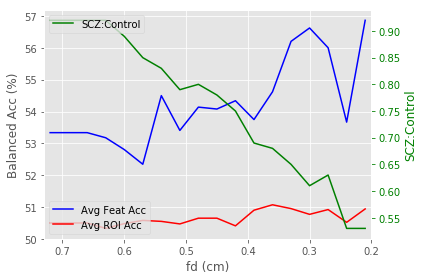

In [2]:
# Plot the fd vs balanced accuracy

# Import and store the fdArray
filePathA = '/Users/AV/Desktop/FeatureMatrixData/fdArray_COBRE_E1.txt'

af.giveMeFDvBalancedAcc(filePathA)

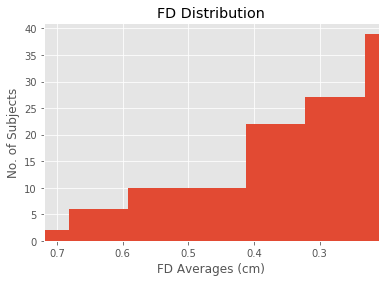

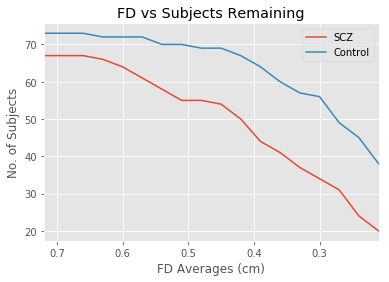

In [3]:
# def showMeFDAcrossSubs(filePath):
    
#     # fd variation across subjects
    
#     fdAvgs = pd.read_csv(filePath,header=None, names=['FD Avgs']);

#     fd = fdArray.iloc[:,0]
#     fdAvgs.hist(column='FD Avgs', bins='auto')

#     plt.xlim(max(fd), min(fd))
#     plt.title('FD Distribution')
#     plt.xlabel('FD Averages (cm)')
#     plt.ylabel('No. of Subjects')
#     plt.show()
    
#     # No. of subjects left as fd decreases
    
#     SCZ = fdArray.iloc[:,1]
#     Control = fdArray.iloc[:,2]

#     fdArray.plot.line(x='fd', y=['SCZ', 'Control'])

#     plt.xlim(max(fd), min(fd))
#     plt.title('FD vs Subjects Remaining')
#     plt.xlabel('FD Averages (cm)')
#     plt.ylabel('No. of Subjects')
#     plt.show()

# Navigate to the 'fdAvgs_DATASET.txt' file
filePathB = '/Users/AV/Dropbox/COBRE/movementData/fdAvgs_COBRE.txt'

af.showMeFDAcrossSubs(filePathA,filePathB)

In [4]:
# Initialise a few boolean variables which decide what the outputs are
    
# regAccOnly = False
# featAccOnly = False

# Region by Region Analysis

# af.Reg_by_Reg_Anal(ROI, tsData, targetCol, ROIs, indices2KeepMat, regAccOnly, dispFigs)

In [5]:
# Feature by Feature Analysis

# af.Feat_by_Feat_Anal(feature, featureName, element, subPath, PyFeatList, indices2KeepMat, targetCol, featAccOnly, dispFigs)